- By [lazarusA](https://lazarusa.github.io/Webpage/index.html)

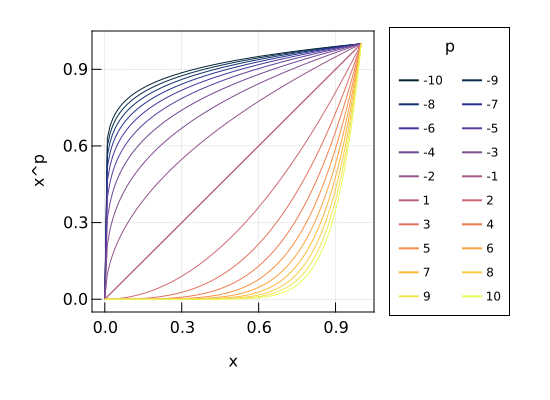

In [1]:
using CairoMakie, ColorSchemes
include("makieTheme1.jl") # don't forget to include the theme. 

xs = 0:0.01:1
p = -10:1:10
p= filter(x->x != 0,collect(p))
ys = zeros(length(xs), length(p))
for (indx,i) in enumerate(p)
    if i <= -1
        ys[:,indx]= xs .^(1/abs(i))
    elseif i>= 1
        ys[:,indx]= xs .^i
    end
end
cbarPal = :thermal
cmap = get(colorschemes[cbarPal], LinRange(0,1,length(p)))

fig = Figure(resolution = (550, 400), font =:sans)
ax = Axis(fig, aspect = 1, xlabel = "x", ylabel = "x^p")
lins = [lines!(xs, ys[:,v], color = cmap[v]) for v in 1:length(p)]
leg = Legend(fig, lins, string.(p), "p", nbanks = 2, labelsize = 12,
        tellheight =true, tellwidth = true, valign = :center)
fig[1, 1] = ax
fig[1, 2] = leg
#save("/results/FigLegendOut2.svg", scene, pt_per_unit = 0.7);
#save("./results/FigLegendOut2.png", fig, px_per_unit = 2)
fig